In [1]:
import seaborn
from polymatheia.data.reader import LocalReader
from polymatheia.data.writer import PandasDFWriter
from polymatheia.filter import RecordsFilter
from polymatheia.transform import RecordsTransform

def map_language(record):
    if record.lang == 'ger' or record.lang == 'deu' or record.lang == 'Deutsch':
        return 'de'
    elif record.lang == 'hun':
        return 'hu'
    elif record.lang == 'swe':
        return 'sv'
    elif record.lang == 'pol':
        return 'pl'
    elif record.lang == 'fre':
        return 'fr'
    elif record.lang == 'cat':
        return 'ca'
    elif record.lang == 'lat':
        return 'la'
    elif record.lang == 'ita':
        return 'it'
    return record.lang

reader = LocalReader('europeana_test')
mapping = ('parallel', ('copy', 'id', 'id'),
                       ('sequence', ('copy', 'lang', 'dcLanguage[0]'), ('custom', 'lang', map_language)),
                       ('custom', 'title_tokens', lambda record: len(record.title[0].split())),
                       ('copy', 'completeness', 'europeanaCompleteness'),
                       ('copy', 'type', 'type'))
transformed = RecordsTransform(reader, mapping)
fltr = ('and', ('exists', ['lang']),
               ('neq', ['lang'], 'mul'),
               ('neq', ['lang'], 'zxx'),
               ('neq', ['lang'], 'und'),
               ('neq', ['lang'], 'la'),
               ('neq', ['lang'], 'sv'),
               ('neq', ['lang'], 'es'),
               ('neq', ['lang'], 'da'),
               ('neq', ['lang'], 'nl'),
               ('neq', ['lang'], 'ca'),
               ('neq', ['lang'], 'it'),
               ('neq', ['lang'], 'et'),
               ('neq', ['lang'], 'en'),
               ('lt', ['title_tokens'], 30))
filtered = RecordsFilter(transformed, fltr)
df = PandasDFWriter().write(filtered)

In [2]:
df

,id,lang,title_tokens,completeness,type
0,/9200386/BibliographicResource_3000044752173,de,13,9,TEXT
1,/9200332/ABO__2BZ22634790X,de,6,5,TEXT
2,/2059210/data_sounds_http___imslp_org_wiki_5_L...,de,9,0,IMAGE
3,/2048609/data_item_uber_dingler_article_pj199_...,de,12,5,TEXT
4,/9200332/ABO__2BZ226370908,de,4,5,TEXT
...,...,...,...,...,...
713,/9200332/ABO__2BZ226348307,de,6,5,TEXT
714,/9200386/BibliographicResource_3000045010262,de,4,7,TEXT
715,/9200386/BibliographicResource_3000045248460,de,10,8,TEXT
716,/9200386/BibliographicResource_3000135531152,de,5,10,TEXT


<AxesSubplot:xlabel='title_tokens'>

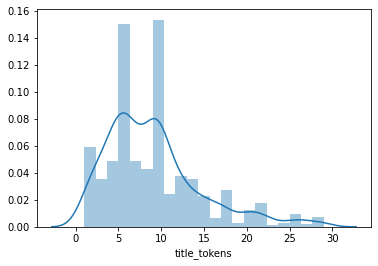

In [3]:
seaborn.distplot(df['title_tokens'])

<AxesSubplot:xlabel='title_tokens'>

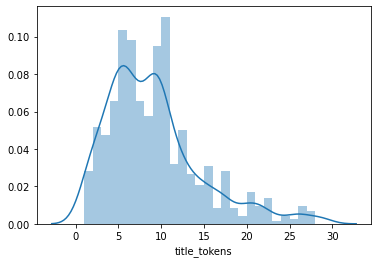

In [4]:
seaborn.distplot(df['title_tokens'], bins=range(0, max(df['title_tokens']), 1))

<AxesSubplot:xlabel='title_tokens', ylabel='completeness'>

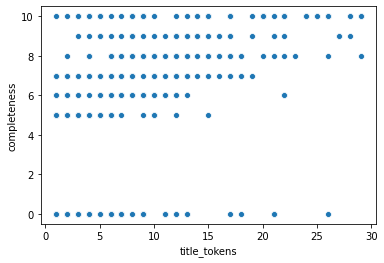

In [5]:
seaborn.scatterplot(x='title_tokens', y='completeness', data=df)

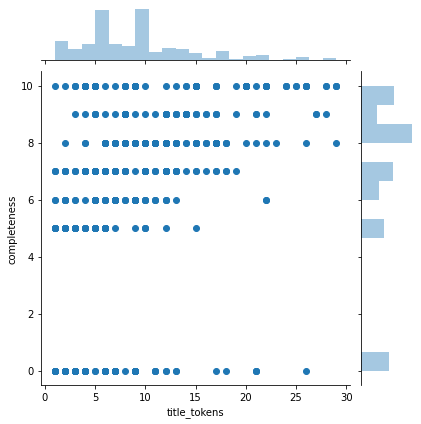

In [6]:
seaborn.jointplot(x='title_tokens', y='completeness', data=df)

<AxesSubplot:xlabel='title_tokens', ylabel='completeness'>

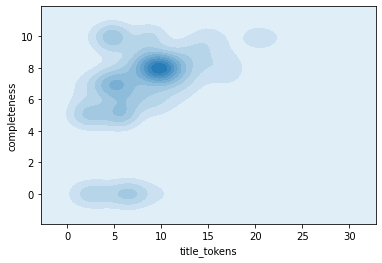

In [7]:
seaborn.kdeplot(df['title_tokens'], df['completeness'], shade=True)

<AxesSubplot:ylabel='title_tokens'>

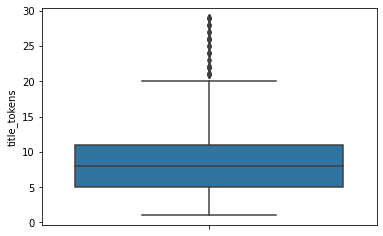

In [8]:
seaborn.boxplot(y='title_tokens', data=df)

<AxesSubplot:xlabel='lang', ylabel='title_tokens'>

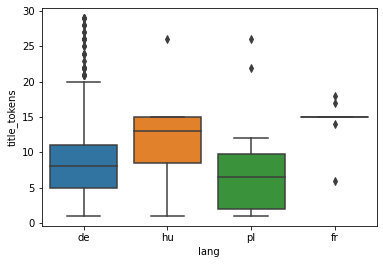

In [9]:
seaborn.boxplot(y='title_tokens', x='lang', data=df)

<AxesSubplot:xlabel='lang', ylabel='title_tokens'>

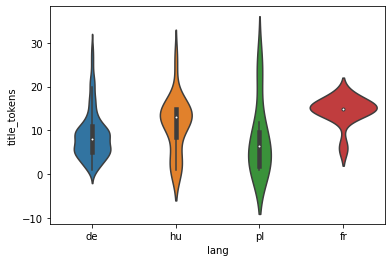

In [10]:
seaborn.violinplot(y='title_tokens', x='lang', data=df)

<AxesSubplot:xlabel='lang', ylabel='count'>

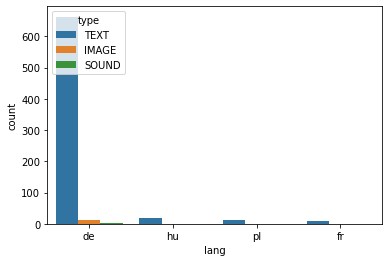

In [15]:
seaborn.countplot(x='lang',hue="type", data=df)